In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
calif_hsng_df = pd.read_csv("../datasets/housing.csv")

In [3]:
calif_hsng_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
calif_hsng_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
501,-122.27,37.85,52.0,335.0,83.0,152.0,77.0,2.2841,106300.0,NEAR BAY
178,-122.23,37.80,52.0,1192.0,289.0,772.0,257.0,2.3833,146900.0,NEAR BAY
18223,-122.08,37.41,20.0,1896.0,456.0,1069.0,436.0,4.6875,288900.0,NEAR BAY
823,-122.05,37.61,16.0,1642.0,346.0,705.0,351.0,2.8971,163900.0,NEAR BAY
5406,-118.44,34.03,30.0,1039.0,303.0,606.0,274.0,3.1250,343800.0,<1H OCEAN


In [5]:
calif_hsng_df.shape

(20640, 10)

In [6]:
calif_hsng_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
calif_hsng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
calif_hsng_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
calif_hsng_df.dropna(inplace=True)

In [10]:
calif_hsng_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
calif_hsng_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Here ,

- the avg age of a house in california is 28

- the max age of a house in california is 52

Also

-- the avg price of a house in california is $206864.

-- the min price of a house in california is $14999    

-- the max price of a house in california is $500001 / seems a bit strange to have one in the dataset -check

**** 

In [12]:
calif_hsng_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

shows how far a house is from the ocean. Housing prices can vary based on this data. Check

**** 

**** 

plotting scatter plots for pairwise relationships allows us to view the impact of certain features on house value.    

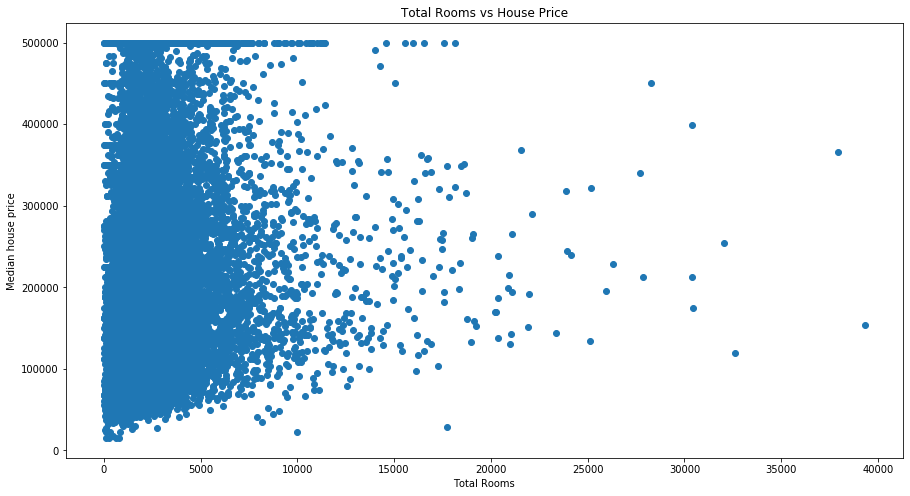

In [13]:
fig, ax = plt.subplots(figsize = (15,8))

plt.scatter(calif_hsng_df['total_rooms'],calif_hsng_df['median_house_value'])

plt.xlabel("Total Rooms")
plt.ylabel("Median house price")

plt.title("Total Rooms vs House Price")

plt.show()

there is some sort of relation here that is kindoff tilted upwards and shows that as the no of rooms increases, the price also increases .

Also notice the cluster at the very top exactly at $500,000. There is a group of points indicating some sort of cap.


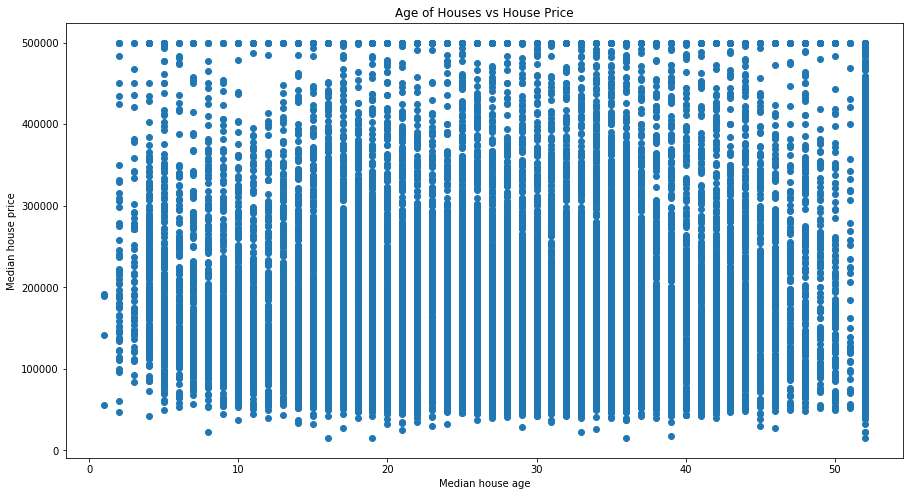

In [15]:
fig, ax = plt.subplots(figsize = (15,8))

plt.scatter(calif_hsng_df['housing_median_age'],calif_hsng_df['median_house_value'])

plt.xlabel("Median house age")
plt.ylabel("Median house price")

plt.title("Age of Houses vs House Price")

plt.show()

its hard to discern any patterns here. Its possible that older the houses are,the cheaper they are. May be its possible that, older houses have better locations.    

There is another clustering of points at age 52. Once again 52 seems like some sort of cap for age of a house.

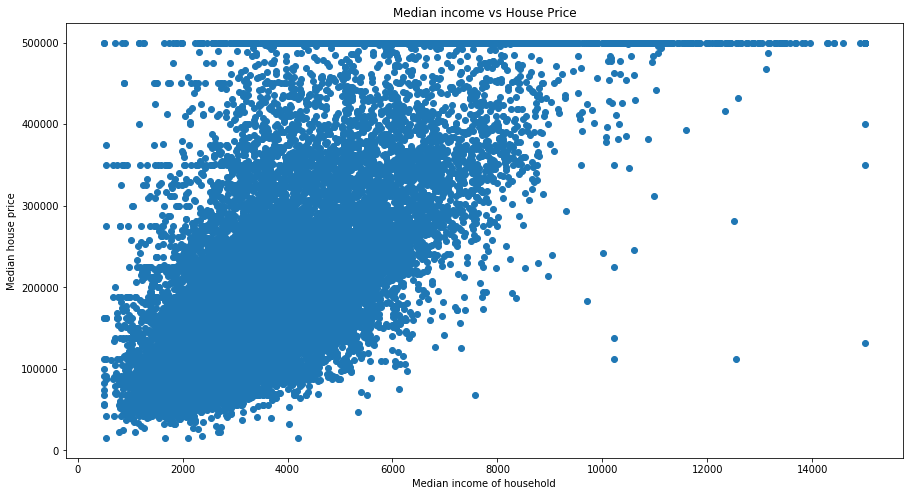

In [20]:
fig, ax = plt.subplots(figsize = (15,8))

plt.scatter(calif_hsng_df['median_income']*1000,calif_hsng_df['median_house_value'])

plt.xlabel("Median income of household")
plt.ylabel("Median house price")

plt.title("Median income vs House Price")

plt.show()

Clear Upward flow showing a positive relationship b/w income and house prices. 

Here also house prices have a capping around $500,000.

**** 

But its also possible that our features has some sort of interplay bw themselves i.e some kind of correlation. 

To view the correlation on the features we can use corr() method

In [9]:
correlation = calif_hsng_df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [13]:
calif_hsng_df.shape

(20433, 10)

correlation is the measure that indiactes the extend to which two or more variables fluctuate together

the median_income &  median_house_value has a correlation of 0.68 which means they are positively correlated

also we can see that total_rooms is slightly positively correlated with median_house_value. 

This kindoff means that median_income is a better predictor of median_house_value as compared to total_rooms.

Rather than relying on raw numbers, correlation can be best visualized using heatmaps

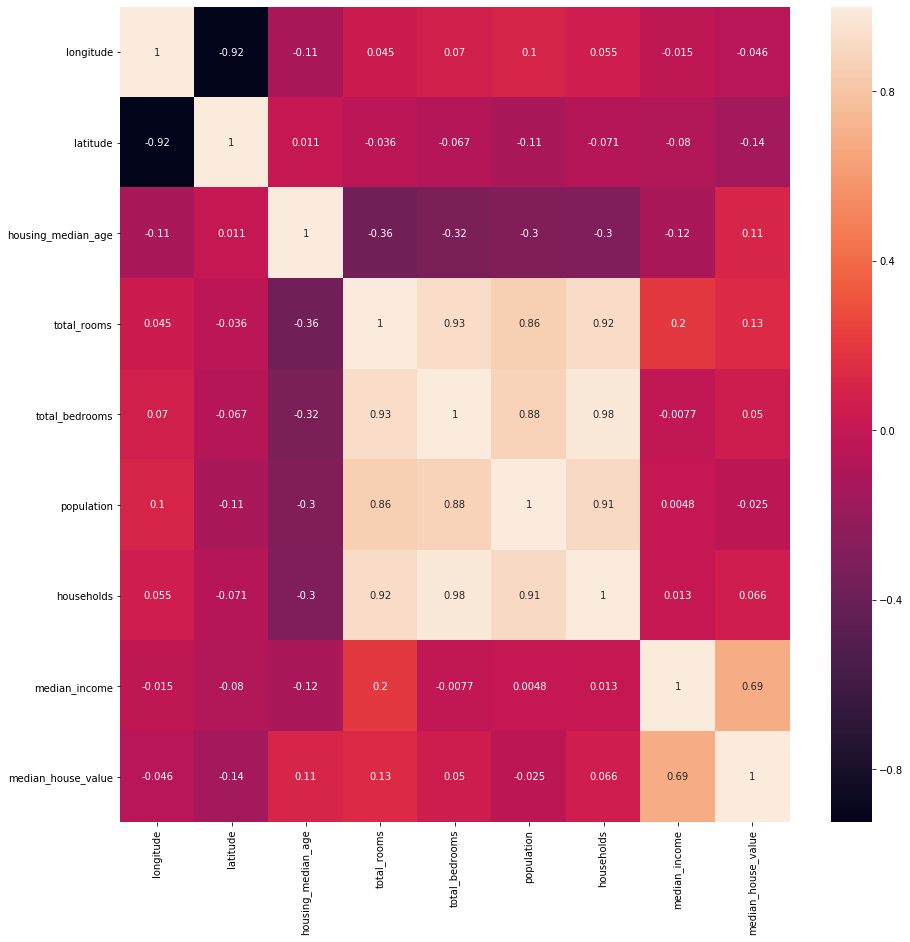

In [14]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation,annot =True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

now,from the scatter plots we have seen no. of points clustered around the top indicating some sort of upper bound clustering or cap at $500000. lets explore this.

We also noticed that the highest value associated with a particular house was $500,001.

In [26]:
calif_hsng_df.loc[calif_hsng_df['median_house_value']== 500001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


Nearly 958 out 20000 rows are at this upper cap. Now something like can skew the training of the machine learning model.

So its best to drop these records from our dataset.

If you are working with skewed datasets where you have lots of points clustered around a single class or a single values, there are techniques to employ for resolving this. 

For this example. i am removing it.

In [27]:
calif_hsng_df = calif_hsng_df.drop(calif_hsng_df.loc[calif_hsng_df['median_house_value']== 500001].index)
# calif_hsng_df.loc[calif_hsng_df['median_house_value']== 500001] # check

Now we can make use of this dataeset to create our ML model.



In [29]:
calif_hsng_df.shape

(19475, 10)

In [30]:
calif_hsng_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


All of the features in our dtaset are numeric values except for ocean_proximity column.

This column contains categorical or discrete values.

ML models can only work with numeric values. If you have categorical or discrete values in your dtaset represented as string , we have to convert it to numeric form. there are several ways to get this done. The most common one is one hot encoding.

To do one hot encoding we can make use of getdummies function in pandas library. It will convert ocean_proximity column to one hot form and will remove the original one.

In [34]:
calif_hsng_df = pd.get_dummies(calif_hsng_df,columns = ["ocean_proximity"])

In [35]:
calif_hsng_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [37]:
calif_hsng_df.shape # now we have 14 columns

(19475, 14)

Having converted all of our features into right form to feed into our ML model, we can now setup the features and targe for our model.

The X values are features that we use to train our ML model.

The Y values are our predictions.

X values are all of of our input columns except the median house value.

Lets create X datframe by dropping the house value column. 

In [40]:
X = calif_hsng_df.drop('median_house_value',axis = 1)

In [41]:
Y = calif_hsng_df['median_house_value']

Y values or target of our ML model are what we want to predict using ML algorithm.

These are the actual Y values that we will use in the training phase.

median houese value is the target that we w'll use to train our model.

In [42]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

When you are using data to train your ML model, it is a common practice to split your data into training set and test set.


Training sets is used to train your model parameters.

Test set is small a portion of original dtaset that we'll hold out that we wont let our model see during the training phase.

Test data is used to measure how well your trained model performs on unseen instances.

Test_train function in scikit learn library can be used for this.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [46]:
display(x_train,x_test,y_train,y_test)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7328,-118.17,33.97,33.0,2410.0,641.0,2106.0,593.0,2.2422,1,0,0,0,0
273,-122.20,37.78,45.0,1766.0,332.0,869.0,327.0,4.5893,0,0,0,1,0
9636,-121.02,36.94,33.0,1541.0,313.0,880.0,272.0,2.5074,0,1,0,0,0
3456,-118.42,34.32,30.0,3027.0,604.0,1970.0,590.0,4.3409,1,0,0,0,0
7746,-118.15,33.93,34.0,1745.0,404.0,1084.0,410.0,3.3411,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,-121.85,36.59,42.0,891.0,203.0,525.0,212.0,3.3156,1,0,0,0,0
19772,-122.17,39.94,32.0,2352.0,477.0,1316.0,447.0,2.2292,0,1,0,0,0
6109,-117.88,34.12,36.0,2029.0,351.0,1327.0,364.0,4.1836,1,0,0,0,0
11979,-117.48,33.98,20.0,2451.0,475.0,1785.0,456.0,3.3966,0,1,0,0,0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1037,-120.69,38.44,13.0,1473.0,265.0,597.0,228.0,4.2917,0,1,0,0,0
18111,-122.03,37.30,30.0,3007.0,554.0,1551.0,616.0,5.8521,1,0,0,0,0
16152,-122.48,37.77,52.0,2556.0,595.0,1202.0,568.0,3.8899,0,0,0,1,0
10183,-117.96,33.86,32.0,2366.0,505.0,1283.0,477.0,3.3516,1,0,0,0,0
5707,-118.23,34.21,36.0,2988.0,719.0,1357.0,657.0,3.5174,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,-119.73,36.31,20.0,2440.0,433.0,1579.0,400.0,2.8281,0,1,0,0,0
11747,-121.14,38.84,22.0,2750.0,433.0,1161.0,428.0,4.2143,0,1,0,0,0
12855,-121.37,38.67,36.0,1354.0,258.0,771.0,267.0,2.2723,0,1,0,0,0
2835,-118.99,35.40,48.0,1908.0,331.0,789.0,321.0,3.5714,0,1,0,0,0


7328     168200.0
273      163500.0
9636     117700.0
3456     156000.0
7746     220500.0
           ...   
9863     186300.0
19772     57400.0
6109     164300.0
11979    115000.0
15371    173200.0
Name: median_house_value, Length: 15580, dtype: float64

1037     121300.0
18111    326300.0
16152    348500.0
10183    190000.0
5707     268000.0
           ...   
3195      60200.0
11747    236500.0
12855     78800.0
2835      84600.0
13788     35000.0
Name: median_house_value, Length: 3895, dtype: float64

Everything Looks fine here

80-20 split is the recommended standard

In addition to splitting the data, train_test_split() function will also shuffle the dataset.

Shuffling is an important step, coz otherwise, ML model will pickup inadvertent patterns in data

In [48]:
x_train.shape,x_test.shape

((15580, 13), (3895, 13))

In [49]:
y_train.shape,y_test.shape

((15580,), (3895,))

Import linear regression estimator from sklearn.linear_model namespace

In [51]:
from sklearn.linear_model import LinearRegression

to perform linear regression, instantiate linear regression object

In [52]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

Normalization is a process used to scale all numeric values in our dataset so that their values are between 0 & 1.

Having all the features in same scale will improve your model performance

Fit function is used to fit the linear model on the training data . i.e train the linear model using our features and target values

Lets take alook at our training scoe : 
    

In [56]:
print("Training score : {}".format(linear_model.score(x_train,y_train)))

Training score : 0.6126297701590949


Score function allows you to evaluate the model.

training score is in terms of Rsquare.

R square is a measure of how well our model captures underlying variation in training data

Here we are using R sqauared to calculate score as it is a regression problem

This can change for other problems like classifcation

A training score of 61 indicates that out model captured 61 % of variation in our training data

61 isn't fantastic , but isn't too bad.

************* 

now lets assign a variable peredictor with all the features used to train our linear model. 

In [65]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Formula to represent a linear model is of the form Y=mx+c ,

- where x represents our features


the linear model wud have calculated a co-efficient for each input feature in our datasets. Lets see the coefficients.

In [66]:
coef = pd.Series(linear_model.coef_,predictors).sort_values()
coef

ocean_proximity_INLAND        -25609.265933
longitude                     -23953.611849
latitude                      -22229.588915
population                       -29.659914
total_rooms                       -7.538261
households                        43.098703
total_bedrooms                    91.577128
housing_median_age               896.948762
ocean_proximity_NEAR BAY        6405.809312
ocean_proximity_<1H OCEAN      12554.561373
ocean_proximity_NEAR OCEAN     17742.917648
median_income                  38530.032490
ocean_proximity_ISLAND        179466.448867
dtype: float64

Above displays, each feature along with its corresponding co-efficient or weights.

We can think of these co-efficients as a measure of how much a particular feature contributed to the prediction , 

Negative values indicate that these are the features that tend to lower the price of a house.

Positive values says that these featues increases the price of a house.

Feature with highest coefficient is ocean_proximity_ISLAND , indicating the most expensive houses in our dataset were located on an island.

Also higher the median income of population in that neighbourhood, housing prices go up and

near the bay or ocean also has a positive effect.

Now we cam use our model to predict something. Lets use our model on test data.

In [67]:
y_predict = linear_model.predict(x_test)

so now lets check how well our model predicted values.

In [68]:
df_pred_actual = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})

In [69]:
df_pred_actual.head(20)

,Predicted,Actual
1037,138141.665239,121300.0
18111,312444.291818,326300.0
16152,266192.991512,348500.0
10183,199175.312046,190000.0
5707,228310.145431,268000.0
9186,308311.155992,323300.0
9971,188173.968011,214500.0
5466,232763.494157,414300.0
7682,180138.884712,166800.0
445,210561.820603,185600.0


Predicted values are pretty close

Sl_learn.metrics has several algorithms to calculate model score for different kinda odf algorithms

Eyeballing the data is good when you want to double check your predictions.

However, it is best to calculate rsquare score on your test data

In [70]:
from sklearn.metrics import r2_score

In [73]:
print("Test Score : " , r2_score(y_test,y_predict))

Test Score :  0.6137226912671891


R2 score on test data is almost as good as it was on training instances. That means that your model performs as well as it performs on training data. 

Now lets use a scatter plot to display actual price vs predicted values.

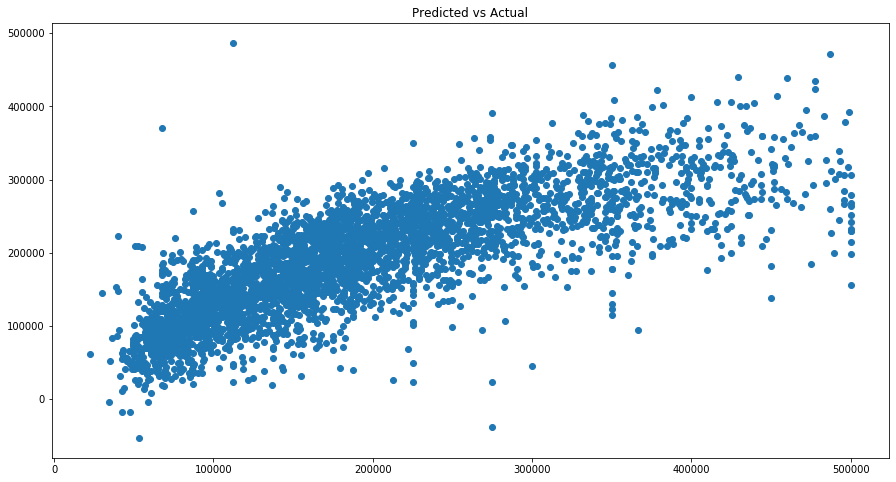

In [76]:
fig, ax = plt.subplots(figsize = (15,8))

plt.scatter(y_test,y_predict)

plt.title("Predicted vs Actual")

plt.show()

Points are clustered together closely.

Lets randomly select some data points and plot them to understand better the model performance .

In [77]:
df_pred_actual_samp = df_pred_actual.sample(100).reset_index().drop(columns = 'index')

In [78]:
df_pred_actual_samp.head()

,Predicted,Actual
0,254598.318222,283900.0
1,299132.813090,193100.0
2,145544.672782,106300.0
3,207086.347201,165400.0
4,311555.434917,235200.0


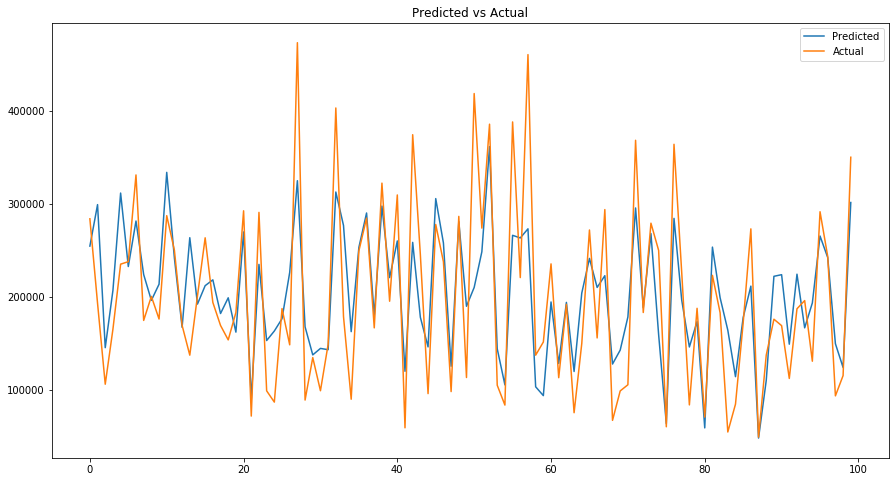

In [81]:
fig, ax = plt.subplots(figsize = (15,8))

plt.plot(df_pred_actual_samp['Predicted'], label = "Predicted")
plt.plot(df_pred_actual_samp['Actual'], label = "Actual")

plt.title("Predicted vs Actual")
plt.legend()
plt.show()

Not Fantastic But not Bad.....!!!!!